|Feature|Type|Description|
|---|---|---|
|SalePrice|Numeric(Continious)|the property's sale price in dollars. This is the target variable that you're trying to predict|.
|MSSubClass|Numeric(Discrete)|The building class|
|MSZoning|Object(Cetagorical)|The general zoning classification|
|LotFrontage|Numeric(Continious)|Linear feet of street connected to property|
|LotArea|Numeric(Continious)|Lot size in square feet|
|Street|Object(Cetagorical)|Type of road access|
|Alley|Object(Cetagorical)|Type of alley access|
|LotShape|Object(Cetagorical)|General shape of property|
|LandContour|Object(Categorical)|Flatness of the property|
|Utilities|Object(Categorical)|Type of utilities available|
|LotConfig|Object(Categorical)|Lot configuration|
|LandSlope|Object(Categorical)|Slope of property|
|Neighborhood|Object(Categorical)|Physical locations within Ames city limits|
|Condition1|Object(Categorical)|Proximity to main road or railroad|
|Condition2|Object(Categorical)|Proximity to main road or railroad (if a second is present)|
|BldgType|Object(Categorical)|Type of dwelling|
|HouseStyle|Object(Categorical)|Style of dwelling|
|OverallQual|Numeric(Discrete)|Overall material and finish quality|
|OverallCond|Numeric(Discrete)|Overall condition rating|
|YearBuilt|Numeric(Discrete)|Original construction date|
|YearRemodAdd|Numeric(Discrete)|Remodel date|
|RoofStyle|Object(Categorical)|Type of roof|
|RoofMatl|Object(Categorical)|Roof material|
|Exterior1st|Object(Categorical)|Exterior covering on house|
|Exterior2nd|Object(Categorical)|Exterior covering on house (if more than one material)|
|MasVnrType|Object(Categorical)|Masonry veneer type|
|MasVnrArea|Numeric(Continious)|Masonry veneer area in square feet|
|ExterQual|Object(Categorical)|Exterior material quality|
|ExterCond|Object(Categorical)|Present condition of the material on the exterior|
|Foundation|Object(Categorical)|Type of foundation|
|BsmtQual|Object(Categorical)|Height of the basement|
|BsmtCond|Object(Categorical)|General condition of the basement|
|BsmtExposure|Object(Categorical)|Walkout or garden level basement walls|
|BsmtFinType1|Object(Categorical)|Quality of basement finished area|
|BsmtFinSF1|Numeric(Continious)|Type 1 finished square feet|
|BsmtFinType2|Object(Categorical)|Quality of second finished area (if present)|
|BsmtFinSF2|Numeric(Continious)|Type 2 finished square feet|
|BsmtUnfSF|Numeric(Continious)|Unfinished square feet of basement area|
|TotalBsmtSF|Numeric(Continious)|Total square feet of basement area|
|Heating|Object(Categorical)|Type of heating|
|HeatingQC|Object(Categorical)|Heating quality and condition|
|CentralAir|Object(Categorical)|Central air conditioning|
|Electrical|Object(Categorical)|Electrical system|
|1stFlrSF|Numeric(Continious)|First Floor square feet|
|2ndFlrSF|Numeric(Continious)|Second floor square feet|
|LowQualFinSF|Numeric(Continious)|Low quality finished square feet (all floors)|
|GrLivArea|Numeric(Continious)|Above grade (ground) living area square feet|
|BsmtFullBath|Numeric(Discrete)|Basement full bathrooms|
|BsmtHalfBath|Numeric(Discrete)|Basement half bathrooms|
|FullBath|Numeric(Discrete)|Full bathrooms above grade|
|HalfBath|Numeric(Discrete)|Half baths above grade|
|Bedroom|Numeric(Discrete)|Number of bedrooms above basement level|
|Kitchen|Numeric(Discrete)|Number of kitchens|
|KitchenQual|Object(Categorical)|Kitchen quality|
|TotRmsAbvGrd|Numeric(Discrete)|Total rooms above grade (does not include bathrooms)|
|Functional|Object(Categorical)|Home functionality rating|
|Fireplaces|Numeric(Discrete)|Number of fireplaces|
|FireplaceQu|Object(Categorical)|Fireplace quality|
|GarageType|Object(Categorical)|Garage location|
|GarageYrBlt|Numeric(Discrete)|Year garage was built|
|GarageFinish|Object(Categorical)|Interior finish of the garage|
|GarageCars|Numeric(Discrete)|Size of garage in car capacity|
|GarageArea|Numeric(Continious)|Size of garage in square feet|
|GarageQual|Object(Categorical)|Garage quality|
|GarageCond|Object(Categorical)|Garage condition|
|PavedDrive|Object(Categorical)|Paved driveway|
|WoodDeckSF|Numeric(Continious)|Wood deck area in square feet|
|OpenPorchSF|Numeric(Continious)|Open porch area in square feet|
|EnclosedPorch|Numeric(Continious)|Enclosed porch area in square feet|
|3SsnPorch|Numeric(Continious)|Three season porch area in square feet|
|ScreenPorch|Numeric(Continious)|Screen porch area in square feet|
|PoolArea|Numeric(Continious)|Pool area in square feet|
|PoolQC|Object(Categorical)|Pool quality|
|Fence|Object(Categorical)|Fence quality|
|MiscFeature|Object(Categorical)|Miscellaneous feature not covered in other categories|
|MiscVal|Numeric(Continious)|$Value of miscellaneous feature|
|MoSold|Numeric(Discrete)|Month Sold|
|YrSold|Numeric(Discrete)|Year Sold|
|SaleType|Object(Categorical)|Type of sale|
|SaleCondition|: |Condition of sale|

## Imports

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer

from sklearn import metrics

pd.set_option("display.max_colwidth", None)

### Load Dataset

In [99]:
# Load dataset and make a datframe based on that
df = pd.read_csv("../data/cleaned_dataset.csv").drop("Unnamed: 0", axis=1)

In [101]:
# Get some basic information of our dataframe
print(f"Sample Data :{df.head()}")
print(f"\n--------------------------\n\n Columns : {[i for i in df.columns]}")
print(f"\n--------------------------\n\n Size of the dataset : {df.shape[0]}")
print(f"\n--------------------------\n\n Total number of features : {df.shape[1]}")
print(f"\n--------------------------\n\n Number of numerical features: {df.select_dtypes(include=[int, float]).shape[1]}")
print(f"\n--------------------------\n\n Number of categorical features: {df.select_dtypes(include=[object]).shape[1]}")

Sample Data :    Id        PID  MS SubClass MS Zoning  Lot Area Lot Shape Lot Config  \
0  109  533352170           60        RL     13517       IR1    CulDSac   
1  544  531379050           60        RL     11492       IR1    CulDSac   
2  153  535304180           20        RL      7922       Reg     Inside   
3  318  916386060           60        RL      9802       Reg     Inside   
4  255  906425045           50        RL     14235       IR1     Inside   

  Neighborhood Condition 1 Bldg Type  ... Garage Area  Paved Drive  \
0       Sawyer        RRAe      1Fam  ...       475.0            Y   
1  Sawyer West        Norm      1Fam  ...       559.0            Y   
2   North Ames        Norm      1Fam  ...       246.0            Y   
3   Timberland        Norm      1Fam  ...       400.0            Y   
4  Sawyer West        Norm      1Fam  ...       484.0            N   

   Wood Deck SF  Open Porch SF  Enclosed Porch Screen Porch Mo Sold Yr Sold  \
0             0             44      

In [102]:
# Define numerical values
# We don't need "PID" and "Id" because they can't be considered as impactful features on our target
# We drop "SalePrice" because it's our target and we just want to have our features
num = df.select_dtypes(include = [int, float]).drop(columns=["Id", "PID", "SalePrice"], axis=1)
num.columns

Index(['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', 'Screen Porch',
       'Mo Sold', 'Yr Sold'],
      dtype='object')

In [103]:
# Check the relationship between basement variables
print(f"The number of Errors between basement variables: {df.loc[(df['BsmtFin SF 1'] + df['BsmtFin SF 2'] + df['Bsmt Unf SF']) != df['Total Bsmt SF'], : ].shape[0]}")

The number of Errors between basement variables: 0


### Assemble Predictor Features (X) and Target (y) 

In [104]:
# Define X (features)
# We don't need "PID" and "Id" because they can't be considered as impactful features on our target
X = df.select_dtypes(include = [int, float]).drop(columns=["Id", "PID", "SalePrice"], axis=1)

# Define y (target)
y= df["SalePrice"]

print(f"The shape of X -------------- {X.shape}")
print(f"The shape of y -------------- {y.shape}")

The shape of X -------------- (1997, 31)
The shape of y -------------- (1997,)


### Baseline Score

In [105]:
# Instantiate Linear Regression Model
lr = LinearRegression()

In [106]:
# Utilize cross_val_score for getting baseline score
print(f"Our Baseline Score for predicting house pricing is ----------------- {np.mean(cross_val_score(lr, X, y, cv=5))}")

Our Baseline Score for predicting house pricing is ----------------- 0.8740433458838526


### Preprocessing on Categorical Features 
For using categorical features in our model, first we need to transform them into numeric values. In this part we will leverage map and one-hot encode for transforming them.

In [107]:
# Replace values with small numbers to "Other" in categorical variables
df = df.replace({
    "MS Zoning": {"C (all)": "Other", "RH": "Other", "A (agr)": "Other", "I (all)": "Other"},
    "Neighborhood": {"Blueste": "Other", "Greens": "Other", "GrnHill": "Other", "Landmrk": "Other"},
    "Condition 1": {"RRNn": "Other", "RRNe": "Other", "PosA": "Other"},
    "House Style": {"1.5Unf": "Other", "2.5Unf": "Other", "2.5Fin": "Other"},
    "Roof Style": {"Mansard": "Other", "Shed": "Other"},
    "Exterior 1st": {"BrkComm": "Other", "Stone": "Other", "CBlock": "Other", "ImStucc": "Other", "AsphShn": "Other"},
    "Exterior 2nd": {"ImStucc": "Other", "Stone": "Other", "AsphShn": "Other", "CBlock": "Other"},
    "Foundation": {"Stone": "Other", "Wood": "Other", "Slab": "Other"},
    "Electrical": {"FuseP": "Other", "Mix": "Other"},
    "Functional": {"Maj2": "Other", "Sev": "Other", "Sal": "Other"},
    "Sale Type": {"ConLD": "Other", "CWD": "Other", "ConLI": "Other", "ConLw": "Other", "Con": "Other", "Oth": "Other"}    
                })

In [109]:
# Define equivalent values
rate_qual = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}

# Columns for mapping
col_map = ["Exter Qual", "Exter Cond", "Bsmt Qual", "Bsmt Cond", "Heating QC", "Kitchen Qual"]

# Make for loop for executing map on columns
for column in col_map:
    df[column] = df[column].replace(to_replace=rate_qual)

In [112]:
# Map values in Basement Exposure with map function
df["Bsmt Exposure"] = df["Bsmt Exposure"].map({"None": 0, "Mn": 1, "Av": 2, "Gd":3})



In [114]:
# Map values in Central Air with map function
df["Central Air"] = df["Central Air"].map({"Y": 1, "N": 0})

In [116]:
df.select_dtypes(include="object").columns

Index(['MS Zoning', 'Lot Shape', 'Lot Config', 'Neighborhood', 'Condition 1',
       'Bldg Type', 'House Style', 'Roof Style', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'BsmtFin Type 1',
       'BsmtFin Type 2', 'Electrical', 'Garage Type', 'Garage Finish',
       'Paved Drive', 'Sale Type'],
      dtype='object')

In [117]:
# Dummify all remaining categorical features
df_allnum = pd.get_dummies(df, drop_first=True)

print(f"number of all features after preprocessing: {df_allnum.shape[1]}")

number of all features after preprocessing: 151


#### Correlation between all features and target after preprocessing on categorical features

In [118]:
saleprice_corr = df_allnum.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)

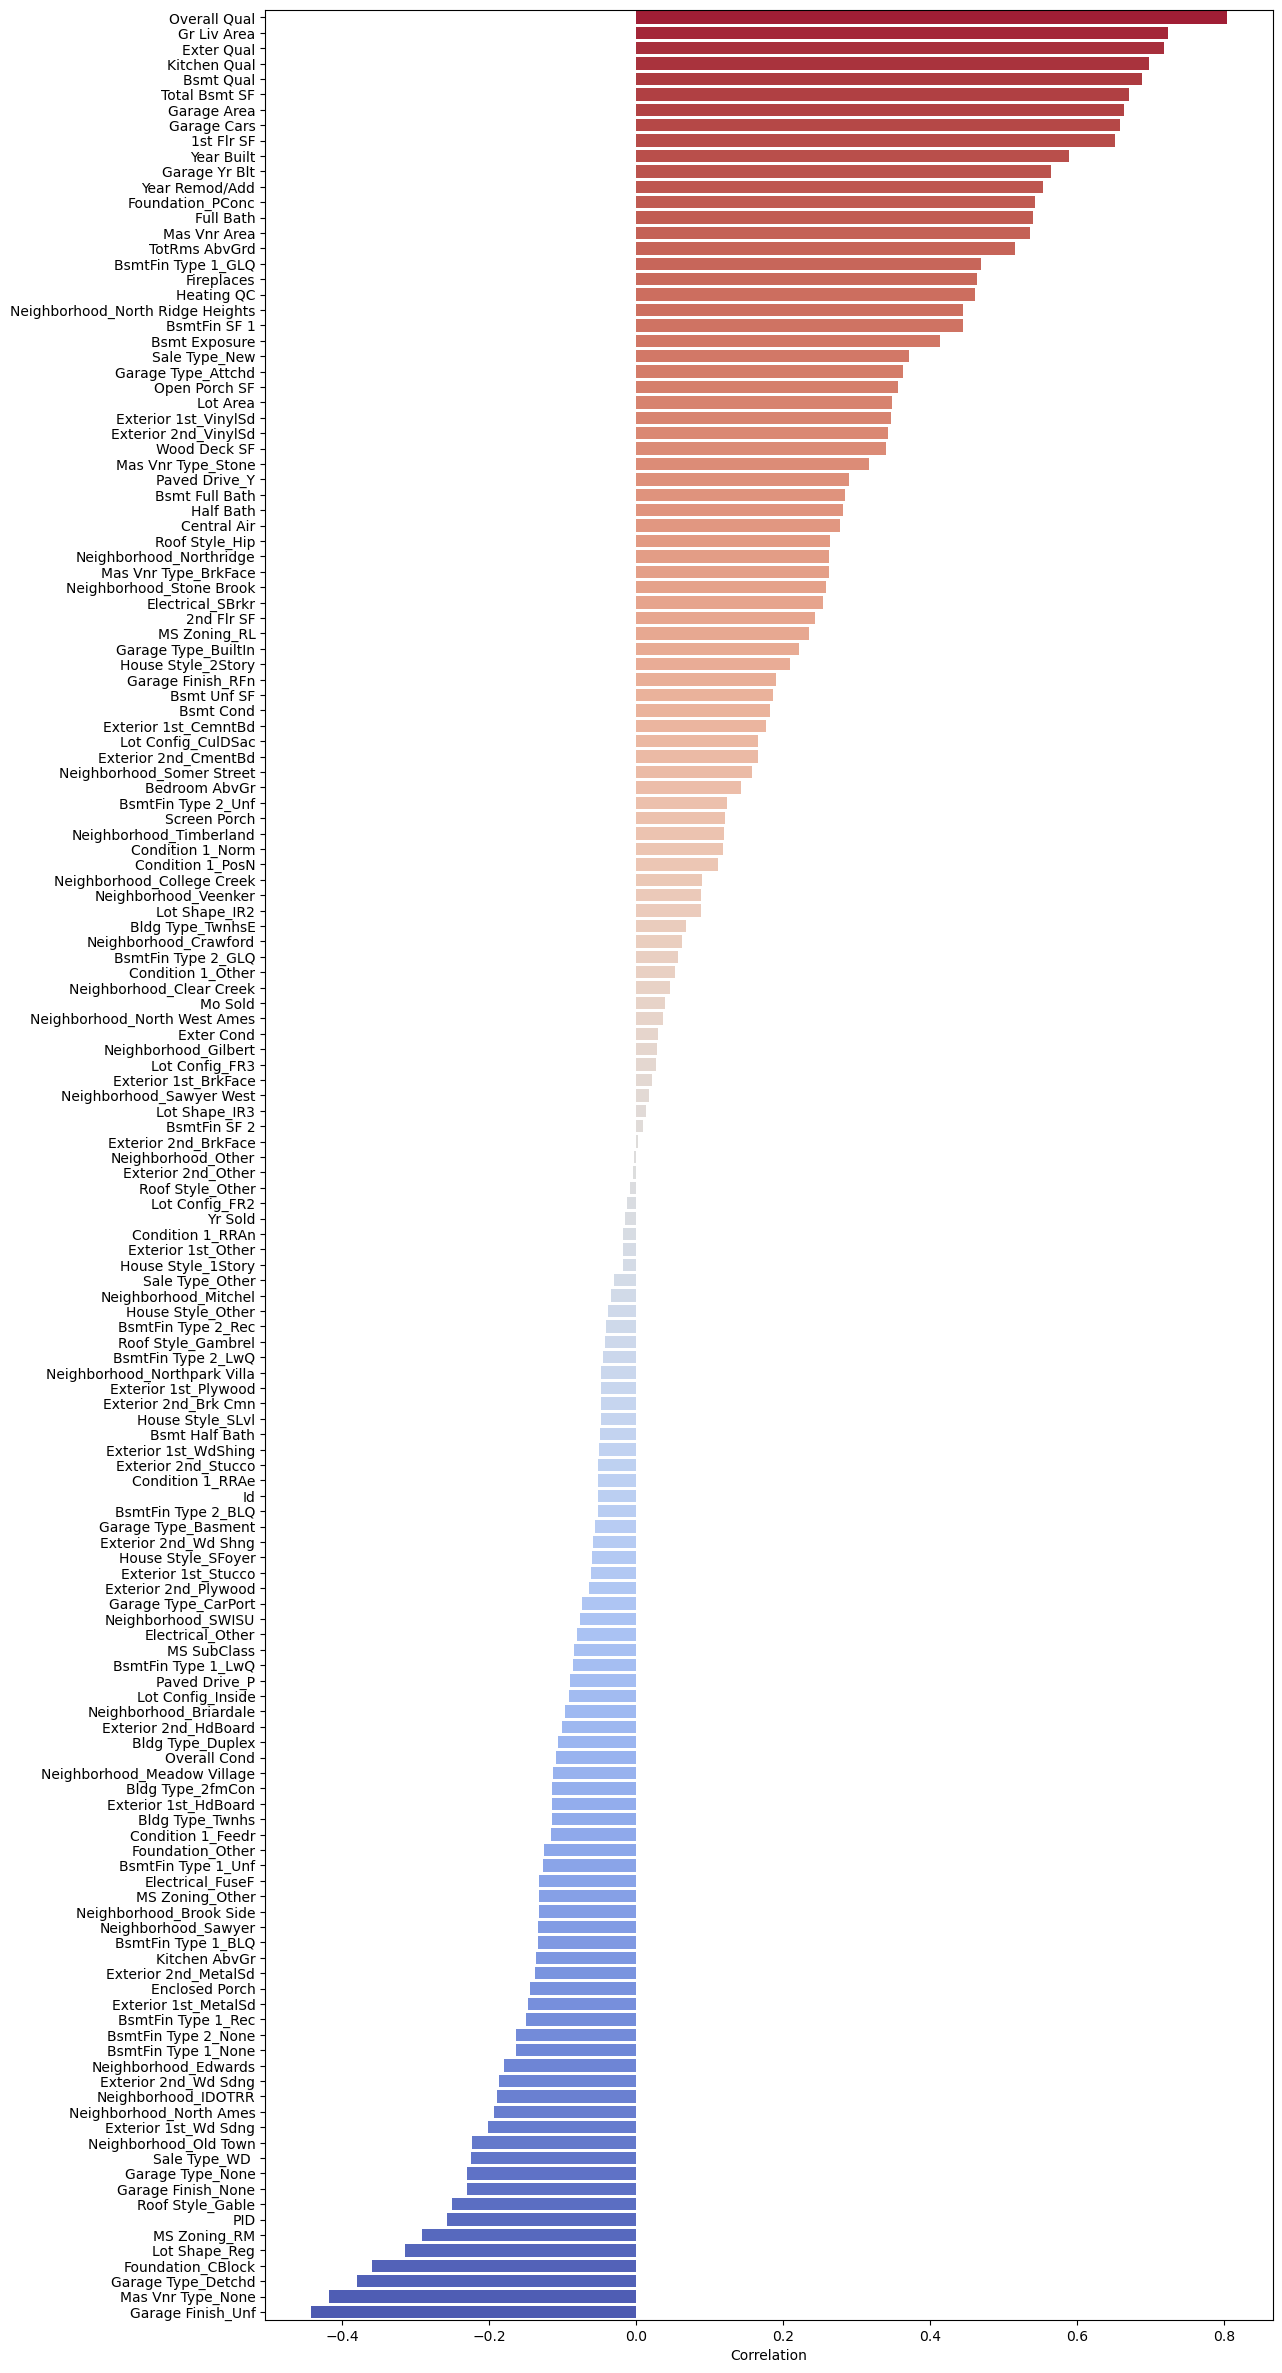

In [119]:
palette_reverse = sns.color_palette("coolwarm", n_colors=saleprice_corr.shape[0]-1)
palette_reverse.reverse()

plt.figure(figsize=(13, 30))
sns.barplot(x=saleprice_corr["SalePrice"][1:].values,
           y=saleprice_corr["SalePrice"][1:].index,
           palette=palette_reverse);
plt.title("")
plt.xlabel("Correlation");

#plt.subplots_adjust(left=0.4, right=0.9, top=0.95, bottom=0.05)

# Maximize the plot window
#manager = plt.get_current_fig_manager()
#manager.window.showMaximized()

# Display the plot
#plt.show()

## Modeling After Preprocessing

In [121]:
# Define X (features)
# We don't need "PID" and "Id" because they can't be considered as impactful features on our target 
X = df_allnum.drop(columns=["Id", "PID", "SalePrice"], axis=1)
y = df_allnum["SalePrice"]

print(f"The shape of X -------------- {X.shape}")
print(f"The shape of y -------------- {y.shape}")

The shape of X -------------- (1997, 148)
The shape of y -------------- (1997,)


#### Train-Test Split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [123]:
ols = LinearRegression()
ols.fit(X_train, y_train)

LinearRegression()

In [129]:
y_hat = ols.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
print(f"Train R2 score is ---------------- {ols.score(X_train, y_train)}")
print(f"Test R2 score is ----------------- {ols.score(X_test, y_test)}")
print(f"Mean Squared Error is ------------ {mse}")
print(f"Root Mean Squered Error is --------{rmse}")

Train R2 score is ---------------- 0.9318410738736632
Test R2 score is ----------------- 0.9075422120063757
Mean Squared Error is ------------ 580725664.9655093
Root Mean Squered Error is --------24098.25024696833
